## Assignment 8
## Data Analytics 1
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features

Columns:
- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT**: Percentage of lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s


### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error

### Getting the Dataset 
##### We are going to work on the Titanic Data set imported from ../Datasets/HousingData.csv

In [2]:
df = pd.read_csv("../Datasets/HousingData.csv")

##### print the data to check if the data imported properly
###### Data dimension -

In [3]:
df.shape

(506, 14)

###### Data Size -

In [4]:
df.size

7084

###### Description of the data frame -

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###### Data types of different columns -

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

###### printing first 5 rows -

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Checking of NULL values

In [8]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### Checking of duplicate values

In [9]:
df.duplicated().sum()

0

### Data Wrangling
Filling the data with average values 

In [10]:
df['CRIM'].fillna(df['CRIM'].mean() , inplace = True) 
df['ZN'].fillna(df['ZN'].mean() , inplace = True) 
df['INDUS'].fillna(df['INDUS'].mean() , inplace = True) 
df['CHAS'].fillna(df['CHAS'].mean() , inplace = True) 
df['AGE'].fillna(df['AGE'].mean() , inplace = True) 
df['LSTAT'].fillna(df['LSTAT'].mean() , inplace = True) 

### Clean Data

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Data Visulisation

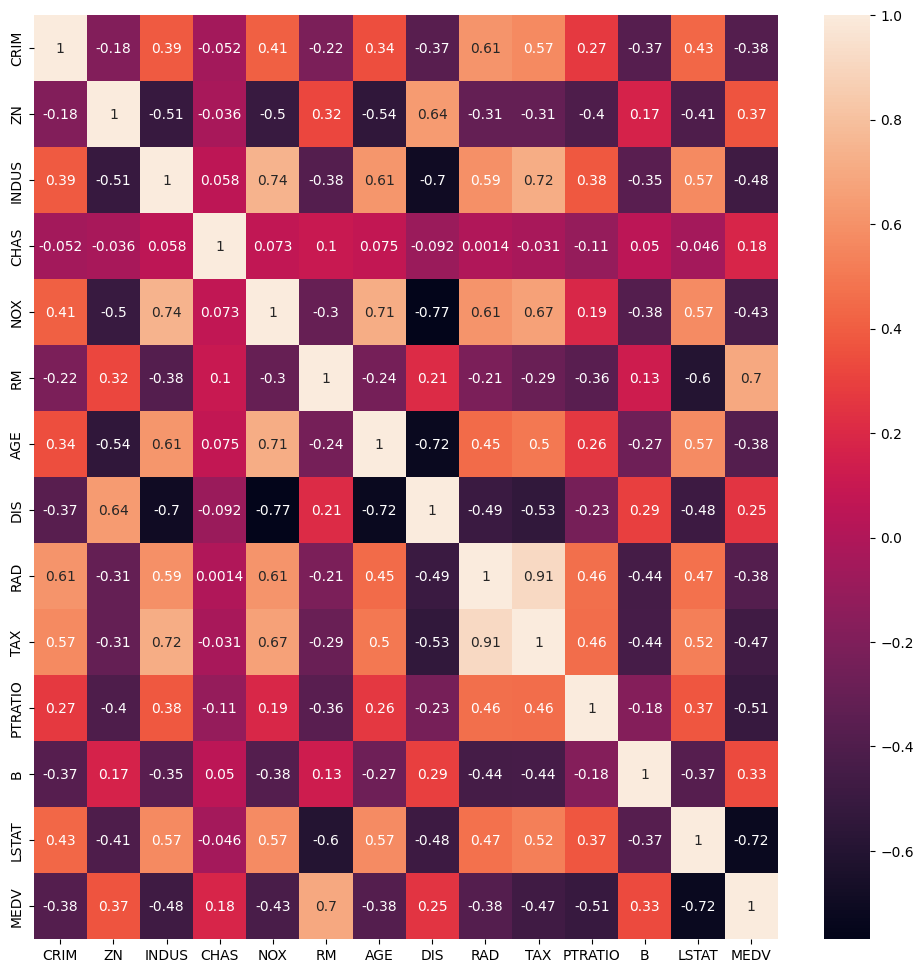

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Data Splitting
here What we expect is that we will have all the other parameters and one of the parameter will be guessed from the other features 

So let ```X``` be features that we have the data about 
and let ```Y``` be the target varible that we will predict about 

Here the ```np.asarray()``` function converts the numpy array which will be used for machine lerning model

In [13]:
X = np.asarray(df.drop(['MEDV'],axis = 1))
y = np.asarray(df['MEDV'])

Now we need to split the data in the training and testing datasets
, this can be done with the ```train_test_split()```

#### Parameters 
* X: Feature array.
* y: Target array.
* test_size: The proportion of the dataset to include in the test split. For example, test_size=0.2 means that 20% of the data will be used for testing, and 80% for training.
* random_state: An optional parameter to seed the random number generator for reproducibility. Setting a specific random_state ensures that the same split is obtained each time the code is run.

#### Output
* X_train: Features for the training set.
* X_test: Features for the testing set.
* y_train: Target values for the training set.
* y_test: Target values for the testing set.


In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=25 )

In [15]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (404, 13)
Shape of X_test:  (102, 13)
Shape of y_train:  (404,)
Shape of y_test (102,)


### Linear Regression Model

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

**Cross Validation Score** estimate the skill of a machine learning model on unseen data

In [18]:
cv_linear = cross_val_score(estimator = model , X = X_train , y = y_train , cv =10)
cv_linear.mean()

0.6862388063952773

**R-Squared value** shows how well the model predicts the outcome of the dependent variable

In [19]:
y_pred_train = model.predict(X_train)
r2_y_pred_train = r2_score(y_train,y_pred_train)
r2_y_pred_train

0.7410245266327636

In [20]:
y_pred_test = model.predict(X_test)
r2_y_pred_test = r2_score(y_test,y_pred_test)
r2_y_pred_test

0.6434284050496258

**Root Mean Squared Error (RMSE)** is one of the two main performance indicators for a regression model
* 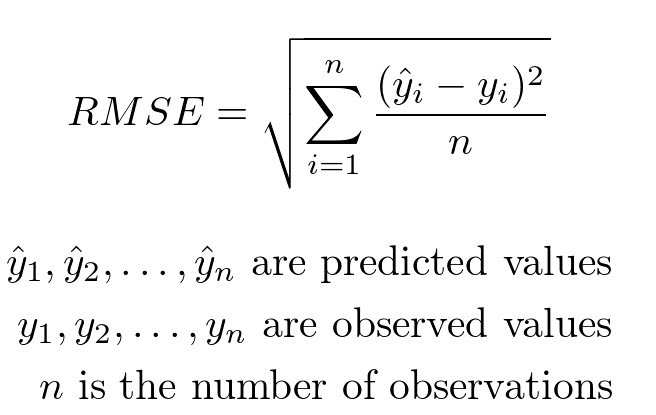

In [23]:
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
rmse_linear

4.9315394629673515